In [1]:
# A train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at A line only
A_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('A')]

In [5]:
# look at all station names
A_train_all['STATION'].unique()

array(['104 ST', '111 ST', '125 ST', '14 ST', '145 ST', '168 ST',
       '175 ST', '181 ST', '190 ST', '34 ST-PENN STA', '42 ST-PORT AUTH',
       '59 ST COLUMBUS', '8 AV', '80 ST', '88 ST', 'AQUEDUCT N.COND',
       'AQUEDUCT RACETR', 'BEACH 105 ST', 'BEACH 25 ST', 'BEACH 36 ST',
       'BEACH 44 ST', 'BEACH 60 ST', 'BEACH 67 ST', 'BEACH 90 ST',
       'BEACH 98 ST', 'BROAD CHANNEL', 'BROADWAY JCT', 'CANAL ST',
       'CHAMBERS ST', 'DYCKMAN ST', 'EUCLID AV', 'FAR ROCKAWAY',
       'FRANKLIN AV', 'FULTON ST', 'GRANT AV', 'HIGH ST',
       'HOWARD BCH JFK', 'HOYT-SCHER', 'INWOOD-207 ST', 'JAY ST-METROTEC',
       'NOSTRAND AV', 'OZONE PK LEFFRT', 'PARK PLACE', 'ROCKAWAY BLVD',
       'ROCKAWAY PARK B', 'TIMES SQ-42 ST', 'UTICA AV', 'W 4 ST-WASH SQ',
       'WORLD TRADE CTR'], dtype=object)

In [6]:
# check station count
A_train_all['STATION'].count()

56

In [8]:
# needs further cleaning
A_train_all["STATION"].replace("TIMES SQ-42 ST", value="42 ST-PORT AUTH", inplace=True)
A_train_all["STATION"].replace("WORLD TRADE CTR", value="CHAMBERS ST", inplace=True)
A_train_all["STATION"].replace("PARK PLACE", value="CHAMBERS ST", inplace=True)

In [9]:
# now sum same name rows
A_commuters = A_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
A_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
104 ST,2441.0,74.0
111 ST,6459.0,146.0
125 ST,8707.0,6616.0
14 ST,3919.0,11802.0
145 ST,13017.0,5495.0


In [10]:
# order stations in excel
# save as csv
A_commuters.to_csv('A_commuters.csv')

In [11]:
# open ordered CSV
csv_path_A = 'A_commuters_order.csv'
A_commuters_order = pd.read_csv(csv_path_A, encoding="utf-8")
A_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,INWOOD-207 ST,11800,1149
1,DYCKMAN ST,8185,96
2,190 ST,1988,212
3,181 ST,12955,1696
4,175 ST,6414,792


In [12]:
A_commuters_order['AM_AVG_ENTER'] = A_commuters_order['AM_ENTERS']/5

In [13]:
A_commuters_order['AM_AVG_EXIT'] = A_commuters_order['AM_EXITS']/5
A_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,INWOOD-207 ST,11800,1149,2360.0,229.8
1,DYCKMAN ST,8185,96,1637.0,19.2
2,190 ST,1988,212,397.6,42.4
3,181 ST,12955,1696,2591.0,339.2
4,175 ST,6414,792,1282.8,158.4


In [14]:
# order stations in excel
# save as csv
A_commuters_order.to_csv('A_commuters_final.csv')

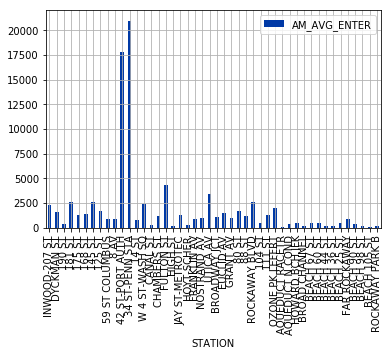

In [32]:
plt = A_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#0039A6')

#ax = plt.add_subplot(111)

plt.grid()

x=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,
                   10000,10500,11000,11500,12000,12500,13000,13500,14000,14500,15000,15500,16000,16500,17000,17500,
                   18000,18500,19000,19500,20000,20500,21000,21500]

AttributeError: 'AxesSubplot' object has no attribute 'add_subplot'

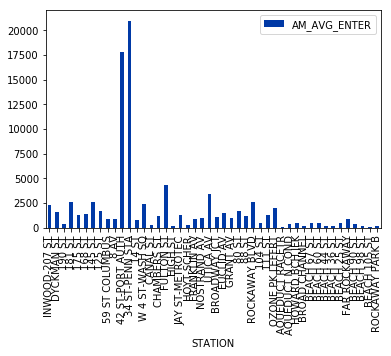

In [29]:
# graph A Train AM AVG ENTERS

#fig = plt.figure()
plt = A_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#0039A6')
ax = plt.add_subplot(111)
ax.plot([1,2,3,14],'ro-')

# set your ticks manually
ax.xaxis.set_ticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,
                   10000,10500,11000,11500,12000,12500,13000,13500,14000,14500,15000,15500,16000,16500,17000,17500,
                   18000,18500,19000,19500,20000,20500,21000,21500])
ax.grid(True)



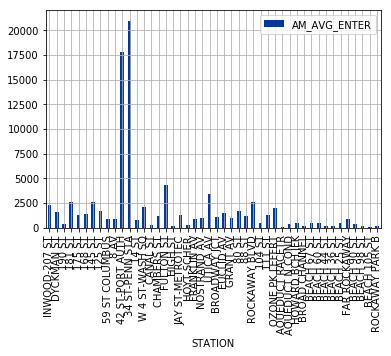

In [14]:
# graph A Train AM AVG ENTERS
plt = A_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('A-AM-enter.pdf')

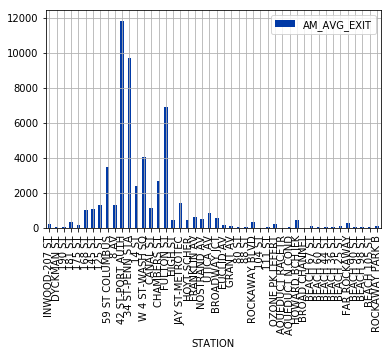

In [15]:
# graph A Train AM AVG EXITS
plt = A_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#0039A6')
plt.grid()

# save the fig
plt.figure.savefig('A-AM-exit.pdf')